# Segmenting and Clustering Neighborhoods in Scaborough, Toronto

## Table of contents

1. Introduction/ Business Problem
2. Data
3. Methodology
4. Results and Discussion
5. Conclusion

## 1. Introduction/ Business Problem

In this project, we will explore data to help stakeholders to find a location in Scarborough, Ontario, Canada to open a take away coffee shop like Starbucks.
Stakeholders are considering whether they should open a coffee shop in an area that is not crowded with coffee shop, restaurants or vice versa. 
Before coming to final decision, they need our data science powers to explore and segment the neighborhoods and corresponding venues.


## 2. Data

Data source used in this project are mainly as described below:
- **Step 1:** In order to explore neighborhoods in the Scarborough, Toronto, we need to get the postal code and all neighborhoods of Scarborough. This information can be scrapped from Wikipedia page below:
https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M  
- **Step 2:** As we need to explore Scarborough’ venues, we will get related latitude and longitude of Scarborough’s neighborhoods based on their postal code. There are not too many public data related to geospatial of Scarborough, so I collected manually from https://www.postalpinzipcodes.com/ based on Postal code get from step 1, and put it into a csv file. 
- **Step 3:** After that, I merge 2 data to create a data frame consists of main columns: Postal Code, Neighborhoods, latitude, longitude. 
- **Step 4:** I used Foursquare API to explore and get the most common venues of Markham using data get from step 3.


## 3. Methodology

- In this project we will try to cluster area of Scarborough that have high Food and Beverage business (like coffee shop and restaurants) density, particularly those high number of coffee shop. 
- I use data scrapped from Wiki and read csv file from local, merge 2 data frames into 1 data frame which will be used to explore Scarborough’ neighborhoods.  
- Also, I will use the Foursquare API to explore neighborhoods in Scarborought. I will use the explore function to get the most common venue categories within radius of 750 metres from each neighborhood, and then use this feature to group the neighborhoods into clusters. 
- Then, I will use the k-means clustering algorithm to cluster the neighborhoods to cluster the neighborhood into 5 clusters with top 10 common venues for each neighborhoods 
- Finally, I will use the Folium library to visualize the neighborhoods in Scarborough  and their emerging clusters

Let's get start!

### 3.1. Webscraping, Creating Dataframe 

##### Import libraries

In [8]:
#!pip install plotly
!pip install bs4

# import libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

##### Scrap data from web and create dataframe of Toronto with M postal code (which include Scarborough city)

In [9]:
# Use the requests library to download the webpage. Save the text of the response as a variable named html_data.
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
html_data = requests.get(url).text

In [10]:
# Parse the html data using beautiful_soup.
soup = BeautifulSoup(html_data,'html5lib')

In [11]:
# Create a list
# More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page.
# These rows will be combined into one row with the neighborhoods separated with a comma.
table_contents=[]
table = soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = ((row.span.text).split('(')[0])
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

In [14]:
# Create dataframe
df = pd.DataFrame(table_contents)
df.shape
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


##### Create Dataframe for Scraborough Neighborhood in cluding postal code, Neighborhood in it

In [15]:
# Create dataframe for Scarborough Neighborhood
scarborough = df[df['Borough']=='Scarborough']
scarborough


,PostalCode,Borough,Neighborhood
6,M1B,Scarborough,"Malvern, Rouge"
12,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
18,M1E,Scarborough,"Guildwood, Morningside, West Hill"
22,M1G,Scarborough,Woburn
26,M1H,Scarborough,Cedarbrae
32,M1J,Scarborough,Scarborough Village
38,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
44,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
51,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
58,M1N,Scarborough,"Birch Cliff, Cliffside West"


##### Create dataframe for latitude and logitude of Neighborhoods in Scarborough

In [16]:
# Read file csv
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_3f2c2ed85b9741a481eb081052fbb645 = 'https://s3.ap-geo.objectstorage.softlayer.net'
else:
    endpoint_3f2c2ed85b9741a481eb081052fbb645 = 'https://s3.ap-geo.objectstorage.service.networklayer.com'

client_3f2c2ed85b9741a481eb081052fbb645 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ociaJP_GFQ6a51dO32m8wPMCrgAnO2kRVqdRhcQA1TOt',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_3f2c2ed85b9741a481eb081052fbb645)

body = client_3f2c2ed85b9741a481eb081052fbb645.get_object(Bucket='nhux27scapstoneprojectnotebook-donotdelete-pr-eb1tbwfm43fobt',Key='Scarborough.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# Create data frame
df_scar = pd.read_csv(body)
df_scar.head()


,Postal Code,Latitude,Longitude
0,M1B,43.8113,-79.1930
1,M1C,43.7878,-79.1564
2,M1E,43.7678,-79.1866
3,M1G,43.7712,-79.2144
4,M1H,43.7686,-79.2389


In [17]:
# Rename columns "PostalCode" of df to "Postal Code"
scarborough.rename(columns={'PostalCode':'Postal Code'}, inplace = True)
scarborough.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Postal Code,Borough,Neighborhood
6,M1B,Scarborough,"Malvern, Rouge"
12,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
18,M1E,Scarborough,"Guildwood, Morningside, West Hill"
22,M1G,Scarborough,Woburn
26,M1H,Scarborough,Cedarbrae


##### Create data frame with details information: Postal Code, Neighborhood, Latitud, Longitude

In [18]:
# Merge 2 dataframe scarborough and df_scar
scarbo = scarborough
scarbo = scarbo.join(df_scar.set_index('Postal Code'), on='Postal Code')
scarbo.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
6,M1B,Scarborough,"Malvern, Rouge",43.8113,-79.1930
12,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.7878,-79.1564
18,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.7678,-79.1866
22,M1G,Scarborough,Woburn,43.7712,-79.2144
26,M1H,Scarborough,Cedarbrae,43.7686,-79.2389


##### Import libraries for clustering and visualization

In [5]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         713 KB

The following NEW packages will be INSTALLED:

  altair             conda-forge/noarch::altair-4.1.0-py_1


##### Define Foursquare Credential

In [6]:
CLIENT_ID = 'QUBW5BOO5DQPXKQ22WN11X3YHTG0USXB4Z3FOPDQHY' # your Foursquare ID
CLIENT_SECRET = 'QIBYJ1TQLC5LRYXKZC1HEUXEE5PJX4EGUBI4FTOFGHQEFR2Q' # your Foursquare Secret
ACCESS_TOKEN = '0Q0R5SC1XFEKYI2PEAIMIAPUNXZR1HOVB1N1D1ZHJPHGMODC' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QUBW5BOO5DQPXKQ22WN11X3YHTG0USXB4Z3FOPDQHY
CLIENT_SECRET:QIBYJ1TQLC5LRYXKZC1HEUXEE5PJX4EGUBI4FTOFGHQEFR2Q


##### Let's get the geographical coordinates of Scarborough

In [7]:
address = 'Scarborough, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Scarborough are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Scarborough are 43.7729744, -79.2576479.


##### Let's visualize Scarborough and the neighborhoods in it (Map 1)

In [19]:
# create map of Scarborough using latitude and longitude values

map_scarborough = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(scarbo['Latitude'], scarbo['Longitude'], scarbo['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_scarborough)  
    
map_scarborough

### 3.2 Explore neighborhoods of Scarborough

##### Get venues with radius 2500 metres from each neighborhoods of Scarborough

In [100]:
# Define function to get nearby venues of all neighborhoods in Scarborough
def getNearbyVenues(names, latitudes, longitudes, radius=2500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&oauth_token={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            ACCESS_TOKEN,
            CLIENT_SECRET, 
            lat, 
            lng, 
            VERSION, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
print('done')

done


In [101]:
# Now write the code to run the above function on each neighborhood and create a new dataframe called _scarborough_venue
scarborough_venues = getNearbyVenues(names=scarbo['Neighborhood'],
                                   latitudes=scarbo['Latitude'],
                                   longitudes=scarbo['Longitude']
                                  )

scarborough_venues.head()

Malvern, Rouge
Rouge Hill, Port Union, Highland Creek
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park, Ionview, East Birchmount Park
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Wexford Heights, Scarborough Town Centre
Wexford, Maryvale
Agincourt
Clarks Corners, Tam O'Shanter, Sullivan
Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West
Upper Rouge


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Malvern, Rouge",43.8113,-79.193,African Rainforest Pavilion,43.817725,-79.183433,Zoo Exhibit
1,"Malvern, Rouge",43.8113,-79.193,Toronto Zoo,43.820582,-79.181551,Zoo
2,"Malvern, Rouge",43.8113,-79.193,Polar Bear Exhibit,43.823372,-79.185145,Zoo
3,"Malvern, Rouge",43.8113,-79.193,Orangutan Exhibit,43.818413,-79.182548,Zoo Exhibit
4,"Malvern, Rouge",43.8113,-79.193,Penguin Exhibit,43.819435,-79.185959,Zoo Exhibit


In [103]:
scarborough_venues.shape

(1425, 7)

##### Let's check how many venues were returned for each neighborhood

In [104]:

scarborough_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,100,100,100,100,100,100
"Birch Cliff, Cliffside West",79,79,79,79,79,79
Cedarbrae,100,100,100,100,100,100
"Clarks Corners, Tam O'Shanter, Sullivan",100,100,100,100,100,100
"Cliffside, Cliffcrest, Scarborough Village West",67,67,67,67,67,67
"Dorset Park, Wexford Heights, Scarborough Town Centre",100,100,100,100,100,100
"Golden Mile, Clairlea, Oakridge",100,100,100,100,100,100
"Guildwood, Morningside, West Hill",58,58,58,58,58,58
"Kennedy Park, Ionview, East Birchmount Park",100,100,100,100,100,100


##### Let's check how many Categories

In [105]:
print('There are {} uniques categories.'.format(len(scarborough_venues['Venue Category'].unique())))

There are 153 uniques categories.


### 3.3. Analyze Each Neighborhood

##### Onehot encoding

In [106]:
# one hot encoding
scarborough_onehot = pd.get_dummies(scarborough_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
scarborough_onehot['Neighborhood'] = scarborough_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [scarborough_onehot.columns[-1]] + list(scarborough_onehot.columns[:-1])
scarborough_onehot = scarborough_onehot[fixed_columns]

print(scarborough_onehot.shape)
scarborough_onehot.head()

(1425, 153)


,Zoo Exhibit,ATM,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Badminton Court,Bakery,Bank,Bar,Beach,Beer Store,Big Box Store,Bistro,Bookstore,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Camera Store,Campground,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice,Czech Restaurant,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Dumpling Restaurant,Electronics Store,Event Space,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fireworks Store,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden Center,Gas Station,Gastropub,General Entertainment,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health Food Store,Hobby Shop,Home Service,Hong Kong Restaurant,Hookah Bar,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Laser Tag,Latin American Restaurant,Liquor Store,Lounge,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Music Store,National Park,Neighborhood,Noodle House,Optical Shop,Other Great Outdoors,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Pool Hall,Portuguese Restaurant,Pub,Ramen Restaurant,Rental Car Location,Restaurant,Rock Climbing Spot,Sandwich Place,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skating Rink,Smoothie Shop,Snack Place,Spa,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Steakhouse,Supermarket,Sushi Restaurant,Taiwanese Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Let's try to get top 5 common venues of each neighborhoods

In [107]:
# Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
scarborough_grouped = scarborough_onehot.groupby('Neighborhood').mean().reset_index()
scarborough_grouped.head()

,Neighborhood,Zoo Exhibit,ATM,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Badminton Court,Bakery,Bank,Bar,Beach,Beer Store,Big Box Store,Bistro,Bookstore,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Camera Store,Campground,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice,Czech Restaurant,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Dumpling Restaurant,Electronics Store,Event Space,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fireworks Store,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden Center,Gas Station,Gastropub,General Entertainment,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health Food Store,Hobby Shop,Home Service,Hong Kong Restaurant,Hookah Bar,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Laser Tag,Latin American Restaurant,Liquor Store,Lounge,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Music Store,National Park,Noodle House,Optical Shop,Other Great Outdoors,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Pool Hall,Portuguese Restaurant,Pub,Ramen Restaurant,Rental Car Location,Restaurant,Rock Climbing Spot,Sandwich Place,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skating Rink,Smoothie Shop,Snack Place,Spa,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Steakhouse,Supermarket,Sushi Restaurant,Taiwanese Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo
0,Agincourt,0.0,0.0,0.01,0.00,0.010000,0.00,0.0,0.01,0.0,0.02,0.020000,0.020000,0.000000,0.020000,0.000000,0.000000,0.01,0.020000,0.0,0.03,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.0,0.0,0.01,0.030000,0.10,0.01,0.040000,0.050000,0.0,0.0,0.01,0.0,0.0,0.00,0.01,0.020000,0.0,0.010000,0.010000,0.00,0.0,0.000000,0.0,0.00,0.020000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.01,0.010000,0.01,0.00,0.0,0.030000,0.0,0.000000,0.000000,0.01,0.000000,0.020000,0.02,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.010000,0.00,0.010000,0.030000,0.0,0.0,0.01,0.000000,0.0,0.01,0.01,0.0,0.01,0.000000,0.01,0.01,0.01,0.01,0.00,0.0,0.000000,0.01,0.000000,0.0,0.01,0.0,0.0,0.000000,0.000000,0.00,0.030000,0.010000,0.0,0.01,0.01,0.00,0.000000,0.0,0.000000,0.040000,0.0,0.030000,0.01,0.020000,0.0,0.0,0.0,0.0,0.0,0.010000,0.000000,0.01,0.0,0.020000,0.020000,0.0,0.0,0.0,0.000000,0.00,0.01,0.0,0.000000,0.0,0.0,0.000000,0.02,0.0,0.000000,0.000000,0.00,0.00,0.0
1,"Birch Cliff, Cliffside West",0.0,0.0,0.00,0.00,0.012658,0.00,0.0,0.00,0.0,0.00,0.025316,0.012658,0.000000,0.037975,0.000000,0.000000,0.00,0.012658,0.0,0.00,0.037975,0.00,0.0,0.0,0.000000,0.012658,0.0,0.0,0.00,0.012658,0.00,0.00,0.000000,0.126582,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.012658,0.0,0.012658,0.025316,0.00,0.0,0.000000,0.0,0.00,0.012658,0.012658,0.0,0.0,0.012658,0.0,0.0,0.012658,0.00,0.000000,0.00,0.00,0.0,0.037975,0.0,0.012658,0.012658,0.00,0.050633,0.025316,0.00,0.00,0.000000,0.012658,0.0,0.0,0.0,0.0,0.0,0.012658,0.00,0.012658,0.000000,0.0,0.0,0.00,0.000000,0.0,0.00,0.00,0.0,0.00,0.012658,0.00,0.00,0.00,0.00,0.00,0.0,0.025316,0.00,0.012658,0.0,0.00,0.0,0.0,0.012658,0.037975,0.00,0.063291,0.063291,0.0,0.00,0.00,0.00,0.037975,0.0,0.000000,0.037975,0.0,0.050633,0.00,0.012658,0.0

In [108]:
# Let's print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in scarborough_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = scarborough_grouped[scarborough_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                  venue  freq
0    Chinese Restaurant  0.10
1           Coffee Shop  0.05
2            Restaurant  0.04
3        Clothing Store  0.04
4  Caribbean Restaurant  0.03


----Birch Cliff, Cliffside West----
            venue  freq
0     Coffee Shop  0.13
1     Pizza Place  0.06
2        Pharmacy  0.06
3  Sandwich Place  0.05
4   Grocery Store  0.05


----Cedarbrae----
            venue  freq
0     Coffee Shop  0.08
1     Gas Station  0.06
2            Bank  0.05
3      Restaurant  0.05
4  Sandwich Place  0.05


----Clarks Corners, Tam O'Shanter, Sullivan----
                  venue  freq
0                  Bank  0.07
1        Sandwich Place  0.06
2  Fast Food Restaurant  0.06
3            Restaurant  0.05
4           Coffee Shop  0.05


----Cliffside, Cliffcrest, Scarborough Village West----
                  venue  freq
0           Coffee Shop  0.10
1              Pharmacy  0.09
2  Fast Food Restaurant  0.09
3           Pizza Place  0.07
4        Sandwich 

##### Let's create the new dataframe and display the top 10 common venues for each neighborhood.

In [109]:
##First, let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [110]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = scarborough_grouped['Neighborhood']

for ind in np.arange(scarborough_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(scarborough_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Chinese Restaurant,Coffee Shop,Restaurant,Clothing Store,Caribbean Restaurant,Indian Restaurant,Bubble Tea Shop,Pharmacy,Sandwich Place,Gas Station
1,"Birch Cliff, Cliffside West",Coffee Shop,Pizza Place,Pharmacy,Sandwich Place,Grocery Store,Beer Store,Pub,Restaurant,Park,Burger Joint
2,Cedarbrae,Coffee Shop,Gas Station,Bank,Restaurant,Sandwich Place,Clothing Store,Gym,Pizza Place,Pharmacy,Indian Restaurant
3,"Clarks Corners, Tam O'Shanter, Sullivan",Bank,Sandwich Place,Fast Food Restaurant,Restaurant,Coffee Shop,Chinese Restaurant,Pharmacy,Greek Restaurant,Supermarket,Burrito Place
4,"Cliffside, Cliffcrest, Scarborough Village West",Coffee Shop,Pharmacy,Fast Food Restaurant,Pizza Place,Sandwich Place,Grocery Store,Ice Cream Shop,Park,Pub,Beach


### 3.4.  Cluster Neighborhoods


##### Run k-means to cluster the neighborhood into 5 clusters.

In [111]:
# set number of clusters
kclusters = 5

scarborough_grouped_clustering = scarborough_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(scarborough_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 0, 0, 2, 0, 0, 2, 0, 3], dtype=int32)

##### Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [112]:

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

scarborough_merged = scarbo

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
scarborough_merged = scarborough_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

scarborough_merged.head() # check the last columns!


,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,M1B,Scarborough,"Malvern, Rouge",43.8113,-79.1930,3,Zoo Exhibit,Fast Food Restaurant,Pizza Place,Trail,Restaurant,Pharmacy,Other Great Outdoors,Grocery Store,Gas Station,Home Service
12,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.7878,-79.1564,2,Coffee Shop,Pharmacy,Breakfast Spot,Park,Hotel,Bank,Sandwich Place,Burger Joint,Fast Food Restaurant,Pizza Place
18,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.7678,-79.1866,2,Coffee Shop,Pizza Place,Park,Fast Food Restaurant,Pharmacy,Breakfast Spot,Burger Joint,Convenience Store,Supermarket,Sandwich Place
22,M1G,Scarborough,Woburn,43.7712,-79.2144,2,Fast Food Restaurant,Coffee Shop,Pizza Place,Gas Station,Bank,Sandwich Place,Supermarket,Restaurant,Pharmacy,Discount Store
26,M1H,Scarborough,Cedarbrae,43.7686,-79.2389,0,Coffee Shop,Gas Station,Bank,Restaurant,Sandwich Place,Clothing Store,Gym,Pizza Place,Pharmacy,Indian Restaurant


In [113]:
# Remove Bourough with NaN venue
scarborough_merged.dropna(axis=0, inplace = True)

##### Let's visulize clusters (Map 2)

In [114]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(scarborough_merged['Latitude'], scarborough_merged['Longitude'], scarborough_merged['Neighborhood'], scarborough_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters



### 3.5. Examine Clusters

###### Cluster 1 

In [116]:
scarborough_merged.loc[scarborough_merged['Cluster Label'] == 0, scarborough_merged.columns[[2] + list(range(5, scarborough_merged.shape[1]))]]

,Neighborhood,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,Cedarbrae,0,Coffee Shop,Gas Station,Bank,Restaurant,Sandwich Place,Clothing Store,Gym,Pizza Place,Pharmacy,Indian Restaurant
38,"Kennedy Park, Ionview, East Birchmount Park",0,Coffee Shop,Sandwich Place,Burger Joint,Fast Food Restaurant,Pizza Place,Ice Cream Shop,Pharmacy,Department Store,Bank,Chinese Restaurant
44,"Golden Mile, Clairlea, Oakridge",0,Coffee Shop,Sandwich Place,Grocery Store,Fast Food Restaurant,Bank,Gym,Restaurant,Burger Joint,Department Store,Discount Store
65,"Dorset Park, Wexford Heights, Scarborough Town...",0,Coffee Shop,Clothing Store,Restaurant,Sandwich Place,Pharmacy,Grocery Store,Fast Food Restaurant,Pizza Place,Bank,Supermarket
71,"Wexford, Maryvale",0,Coffee Shop,Middle Eastern Restaurant,Fast Food Restaurant,Pizza Place,Gas Station,Sandwich Place,Pharmacy,Supermarket,Grocery Store,Burger Joint
78,Agincourt,0,Chinese Restaurant,Coffee Shop,Restaurant,Clothing Store,Caribbean Restaurant,Indian Restaurant,Bubble Tea Shop,Pharmacy,Sandwich Place,Gas Station
82,"Clarks Corners, Tam O'Shanter, Sullivan",0,Bank,Sandwich Place,Fast Food Restaurant,Restaurant,Coffee Shop,Chinese Restaurant,Pharmacy,Greek Restaurant,Supermarket,Burrito Place


###### Cluster 2 

In [117]:
scarborough_merged.loc[scarborough_merged['Cluster Label'] == 1, scarborough_merged.columns[[2] + list(range(5, scarborough_merged.shape[1]))]]

,Neighborhood,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
95,Upper Rouge,1,Zoo Exhibit,Other Great Outdoors,Fast Food Restaurant,Dessert Shop,Trail,Restaurant,Ice Cream Shop,Grocery Store,Golf Course,Zoo


###### Cluster 3 

In [118]:
scarborough_merged.loc[scarborough_merged['Cluster Label'] == 2, scarborough_merged.columns[[2] + list(range(5, scarborough_merged.shape[1]))]]

,Neighborhood,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,"Rouge Hill, Port Union, Highland Creek",2,Coffee Shop,Pharmacy,Breakfast Spot,Park,Hotel,Bank,Sandwich Place,Burger Joint,Fast Food Restaurant,Pizza Place
18,"Guildwood, Morningside, West Hill",2,Coffee Shop,Pizza Place,Park,Fast Food Restaurant,Pharmacy,Breakfast Spot,Burger Joint,Convenience Store,Supermarket,Sandwich Place
22,Woburn,2,Fast Food Restaurant,Coffee Shop,Pizza Place,Gas Station,Bank,Sandwich Place,Supermarket,Restaurant,Pharmacy,Discount Store
32,Scarborough Village,2,Fast Food Restaurant,Coffee Shop,Pizza Place,Sandwich Place,Pharmacy,Grocery Store,Beer Store,Indian Restaurant,Bank,Supermarket
51,"Cliffside, Cliffcrest, Scarborough Village West",2,Coffee Shop,Pharmacy,Fast Food Restaurant,Pizza Place,Sandwich Place,Grocery Store,Ice Cream Shop,Park,Pub,Beach
58,"Birch Cliff, Cliffside West",2,Coffee Shop,Pizza Place,Pharmacy,Sandwich Place,Grocery Store,Beer Store,Pub,Restaurant,Park,Burger Joint


###### Cluster 4

In [119]:
scarborough_merged.loc[scarborough_merged['Cluster Label'] == 3, scarborough_merged.columns[[2] + list(range(5, scarborough_merged.shape[1]))]]

,Neighborhood,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,"Malvern, Rouge",3,Zoo Exhibit,Fast Food Restaurant,Pizza Place,Trail,Restaurant,Pharmacy,Other Great Outdoors,Grocery Store,Gas Station,Home Service


###### Cluster 5

In [120]:
scarborough_merged.loc[scarborough_merged['Cluster Label'] == 4, scarborough_merged.columns[[2] + list(range(5, scarborough_merged.shape[1]))]]

,Neighborhood,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
85,"Milliken, Agincourt North, Steeles East, L'Amo...",4,Chinese Restaurant,Coffee Shop,Bakery,Bubble Tea Shop,Pizza Place,Vietnamese Restaurant,Dessert Shop,Sandwich Place,Japanese Restaurant,Korean Restaurant
90,"Steeles West, L'Amoreaux West",4,Chinese Restaurant,Coffee Shop,Japanese Restaurant,Sandwich Place,Fast Food Restaurant,Pharmacy,Bakery,Bank,Gas Station,Pizza Place


### 3.6. Let's deep dive into coffee shop density

##### Get all coffeeshops of neighborhoods

In [139]:
coffee = scarborough_venues1[scarborough_venues['Venue Category']=='Coffee Shop']
coffee.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
34,"Malvern, Rouge",43.8113,-79.1930,Tim Hortons,43.802000,-79.198169,Coffee Shop
81,"Rouge Hill, Port Union, Highland Creek",43.7878,-79.1564,Starbucks,43.797580,-79.149083,Coffee Shop
88,"Rouge Hill, Port Union, Highland Creek",43.7878,-79.1564,Tim Hortons,43.799637,-79.144517,Coffee Shop
92,"Rouge Hill, Port Union, Highland Creek",43.7878,-79.1564,Mr. Beans Coffee Co.,43.779646,-79.137885,Coffee Shop
93,"Rouge Hill, Port Union, Highland Creek",43.7878,-79.1564,Tim Hortons,43.799002,-79.147037,Coffee Shop


In [128]:
coffee.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,5,5,5,5,5,5
"Birch Cliff, Cliffside West",10,10,10,10,10,10
Cedarbrae,8,8,8,8,8,8
"Clarks Corners, Tam O'Shanter, Sullivan",5,5,5,5,5,5
"Cliffside, Cliffcrest, Scarborough Village West",7,7,7,7,7,7
"Dorset Park, Wexford Heights, Scarborough Town Centre",8,8,8,8,8,8
"Golden Mile, Clairlea, Oakridge",10,10,10,10,10,10
"Guildwood, Morningside, West Hill",5,5,5,5,5,5
"Kennedy Park, Ionview, East Birchmount Park",8,8,8,8,8,8


##### Let's visualize coffee shop and clusters (Map 3)

In [96]:
# create map of Scarborough using latitude and longitude values
# map_coffee1 = folium.Map(location=[latitude, longitude], zoom_start=11)

# create map_cluster
map_clusters1 = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers of coffee_shop to map
for lat, lng, label in zip(coffee_2000['Venue Latitude'], coffee_2000['Venue Longitude'], coffee_2000['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters1)  
    

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers of clusters to the map
markers_colors = []
for lat, lon, poi, cluster in zip(scarborough_merged['Latitude'], scarborough_merged['Longitude'], scarborough_merged['Neighborhood'], scarborough_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters1)

map_clusters1

    

##### Create chart to view number of venue each neiborhoods

In [151]:
coffee1 = coffee[['Neighborhood','Venue']]
coffee_num=coffee1.groupby('Neighborhood').count()
coffee_num

,Venue
Neighborhood,
Agincourt,5
"Birch Cliff, Cliffside West",10
Cedarbrae,8
"Clarks Corners, Tam O'Shanter, Sullivan",5
"Cliffside, Cliffcrest, Scarborough Village West",7
"Dorset Park, Wexford Heights, Scarborough Town Centre",8
"Golden Mile, Clairlea, Oakridge",10
"Guildwood, Morningside, West Hill",5
"Kennedy Park, Ionview, East Birchmount Park",8


### Create bar chart (Chart 1)

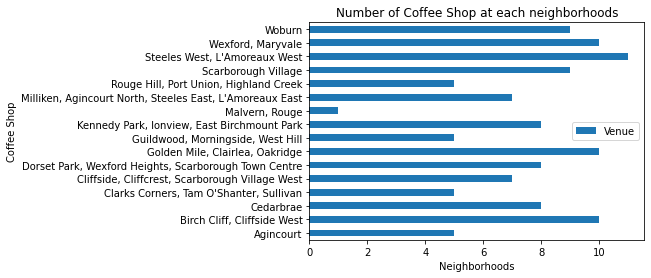

In [153]:
import matplotlib as mpl
import matplotlib.pyplot as plt
coffee_num.plot(kind="barh")
plt.title('Number of Coffee Shop at each neighborhoods')
plt.xlabel('Neighborhoods')
plt.ylabel('Coffee Shop')
plt.show()

# 4. Results and Discussion

As you can see from **Map 3** above, after clustered into 5 cluster, cluster 2.0 (Blue color marker) have many Food and Beverage Business like coffee shop, restaurant and shopping center ...compared to other clusters. This show that there are a lot of customers around the area. People tends to come to those areas for business meetings, shopping and relax. 
Beside, Chart 1 show that **Steeles West, L'Amoreaux West** have most coffee shops around the area.
Other clusters's top ten common venues are not crowed with F&B as shown in the **Map 3**, especially cluster 3.0 (neon green color). If stakeholders decide to open a coffee shop in the area that is not crowed with coffee shop, Marven and Rouge would be a great choice


# 5. Conclusion

Whether the decision of Stakeholder are Area that is crowded with coffee shop or vice versa, I beleave that the analysis report have helped stakeholder to have a 